In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [95]:
train = pd.read_csv('csv/train.csv')
# test = pd.read_csv('csv/test.csv')

In [136]:
test = pd.read_csv('csv/test.csv')

In [96]:
y_train = train[['SalePrice']]
X_train = train.drop(['SalePrice', 'MasVnrArea'], axis=1)

In [97]:
# X_train = train.drop(["Id","SalePrice", "PoolQC", "MiscFeature", "MiscVal", "Alley", "Fence", "FireplaceQu", "Street", "Utilities", "LandSlope", "Condition1", "Condition2", "RoofMatl", "PavedDrive", "MasVnrArea"], axis=1)
# y_train = train[["SalePrice"]]

# X_train["LotShape1"] = X_train.LotShape.map({"Reg": "Reg", "IR1": "Irr", "IR2": "Irr", "IR3": "Irr"})
# X_train.drop("LotShape", axis=1, inplace=True)

X_train["LotFrontage"].fillna(X_train["LotFrontage"].mean(), inplace=True)
X_train["GarageYrBlt"].fillna(X_train["GarageYrBlt"].mean(), inplace=True)

In [98]:
# X_train.isnull().sum().sort_values(ascending=False).head(25)
# X_train.dtypes[65:85]

In [99]:
object_cols = X_train.columns[X_train.dtypes == "object"]
for col in object_cols:
    X_train[col] = X_train[col].astype("category")

category_cols = X_train.columns[X_train.dtypes == "category"]
for col in category_cols:
    y = pd.get_dummies(X_train[col], prefix=col)
    u = pd.concat([X_train, y], axis=1)
    X_train = u.drop([col], axis=1)

<AxesSubplot: xlabel='# of Features'>

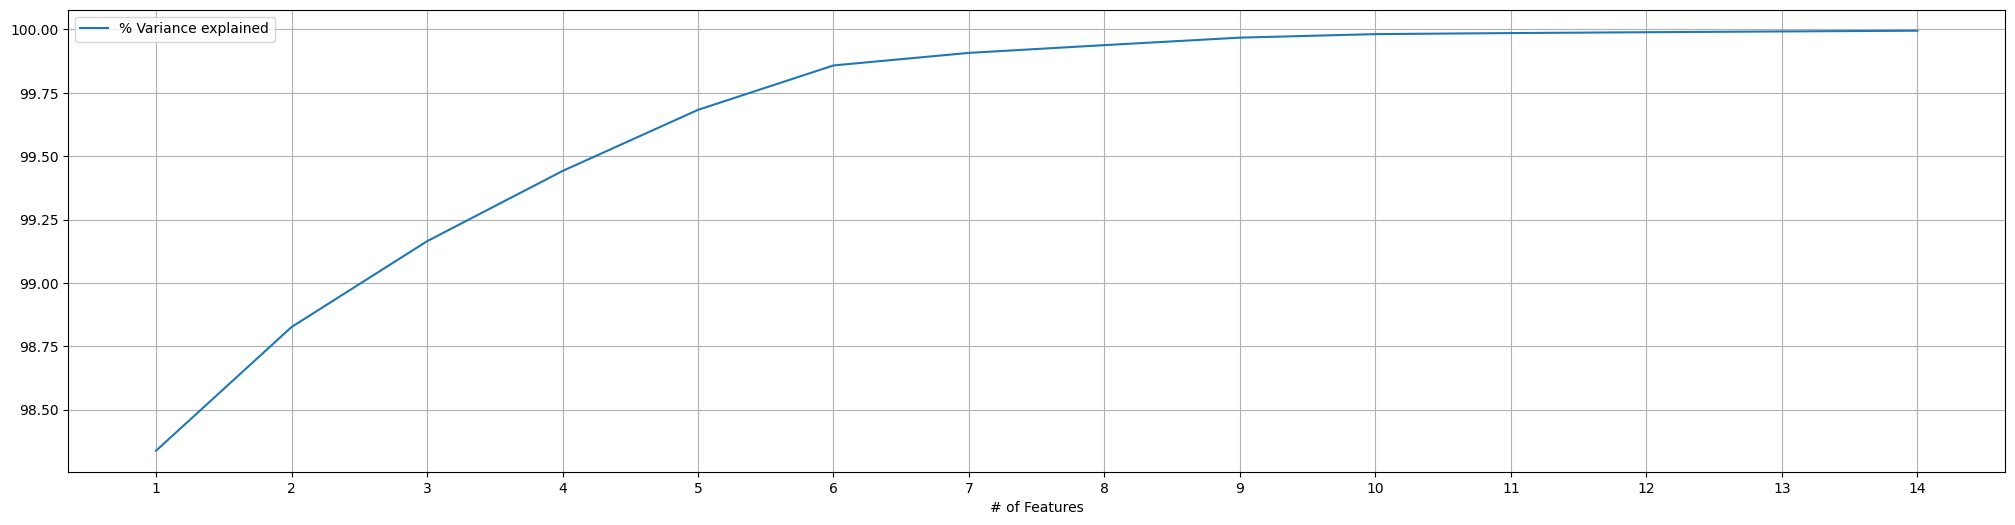

In [125]:
pca = PCA(n_components=14).fit(X_train)
v_ratio = pca.explained_variance_ratio_

data = pd.DataFrame({'# of Features':range(1, len(v_ratio)+1), '% Variance explained':np.cumsum(v_ratio*100)})
data.plot(x=0, y=1, xticks=range(1, len(v_ratio)+1), grid=True, figsize=(25,6))

<AxesSubplot: xlabel='# of Features'>

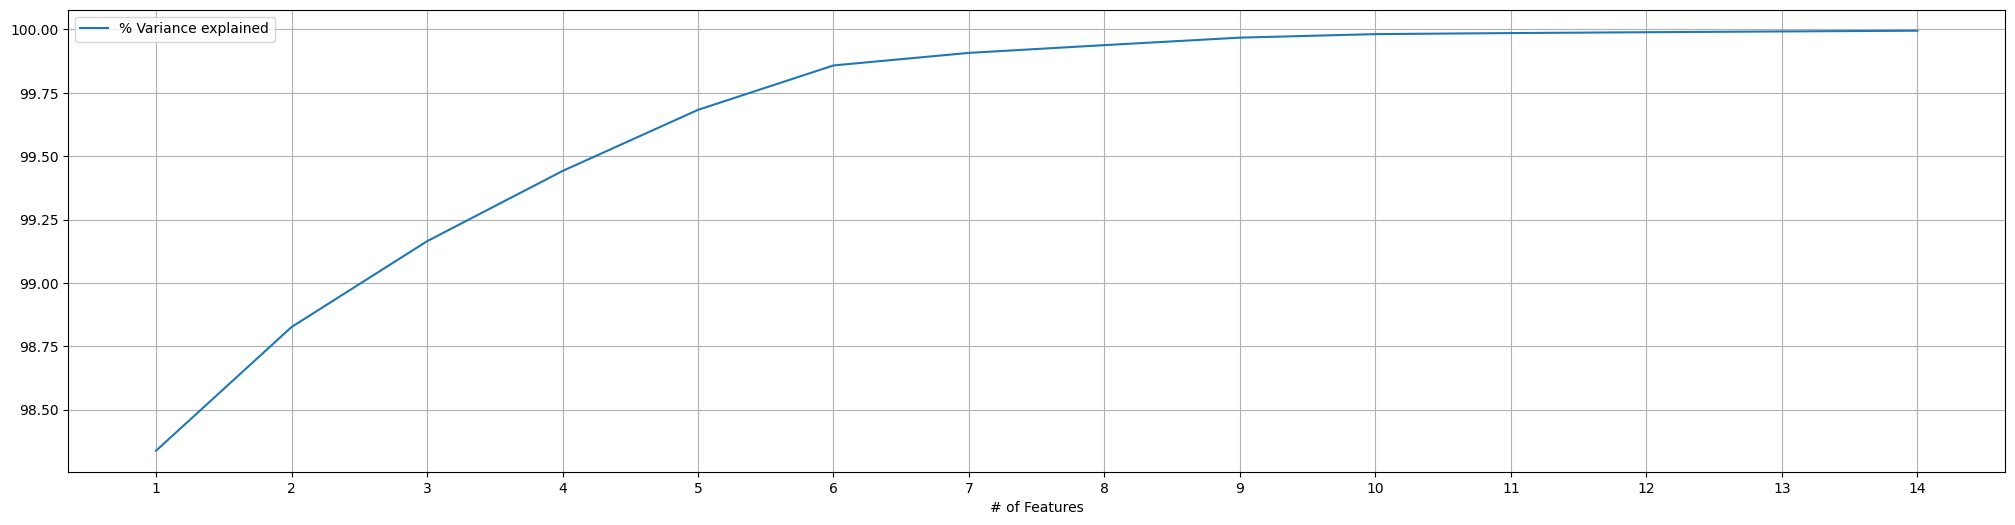

In [113]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=14)),
    ]
)
pipe.fit(X_train)

v_ratio = pca.explained_variance_ratio_

data = pd.DataFrame({'# of Features':range(1, len(v_ratio)+1), '% Variance explained':np.cumsum(v_ratio*100)})
data.plot(x=0, y=1, xticks=range(1, len(v_ratio)+1), grid=True, figsize=(25,6))

In [131]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [1, 2, 3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]
}

model = GradientBoostingRegressor()
grid = GridSearchCV(model, param_grid, cv=5, scoring="r2", n_jobs=-1)

model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=14)),
        ("grid", grid),
    ]
)
model.fit(X_train, y_train)

/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemb

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=14)),
                ('grid',
                 GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.01, 0.05, 0.1,
                                                            0.2, 0.3],
                                          'max_depth': [1, 2, 3, 4, 5],
                                          'n_estimators': [100, 200, 300, 400,
                                                           500]},
                              scoring='r2'))])

In [132]:
model.score(X_train, y_train)

0.950760342912925

In [137]:
y_pred = model.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Alley
- BldgType
- BsmtCond
- BsmtExposure
- BsmtFinType1
- ...
Feature names seen at fit time, yet now missing:
- Alley_Grvl
- Alley_Pave
- BldgType_1Fam
- BldgType_2fmCon
- BldgType_Duplex
- ...


In [41]:
# profile report
# profile = ProfileReport(X_train, title="Pandas Profiling Report")
# profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
pipelines = []
scoring = "neg_mean_squared_log_error"

pipelines.append(
    (
        "scaledGBR",
        Pipeline([("Scaler", StandardScaler()), ("GBR", GradientBoostingRegressor())]),
    )
)
pipelines.append(
    (
        "scaledRFR",
        Pipeline([("Scaler", StandardScaler()), ("RFR", RandomForestRegressor())]),
    )
)

results = []
names = []

for name, model in pipelines:
    cv_results = cross_val_score(
        model, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1
    )
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/ensemb

scaledGBR: -0.01671822711783193 (0.005146014530848907)


/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/choekyelnyungmartsang/opt/anaconda3/envs/MODEL/lib/python3.10/site-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/choekyelnyungmartsang/opt/a

scaledRFR: -0.020830976795544166 (0.0052660378184390625)


In [35]:
results

[array([-0.0159075 , -0.01190252, -0.0130461 , -0.02850961, -0.02306347,
        -0.01306947, -0.01617124, -0.01336226, -0.01272239, -0.01942771]),
 array([-0.0220956 , -0.01465525, -0.01825552, -0.02898799, -0.027978  ,
        -0.01263527, -0.01941998, -0.01606846, -0.02420165, -0.02401205])]

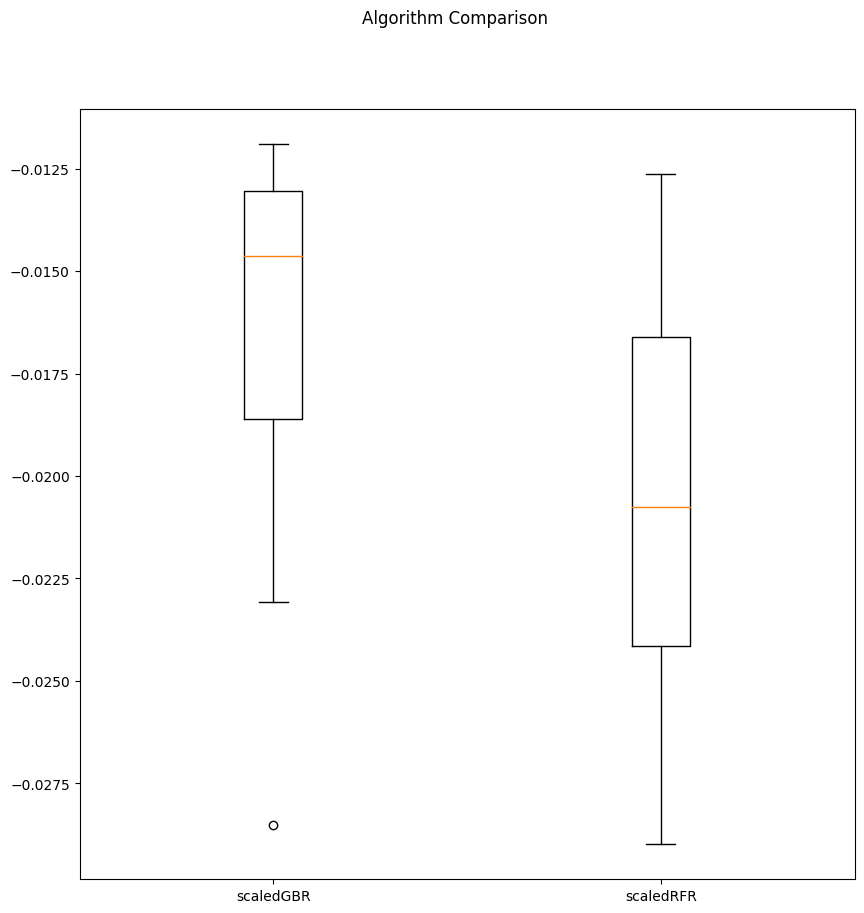

In [36]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()